<a href="https://colab.research.google.com/github/kelvinmadeleke/Customer-Segmentation-for-Retail-or-E-Commerce-k-means-/blob/main/Customer_Segmentation_for_Retail_or_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import py as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel('/content/Online Retail.xlsx')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.dtypes


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.drop(['InvoiceNo'],axis=1, inplace=True)

<ipython-input-28-489df6e03f60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['InvoiceNo'],axis=1, inplace=True)


In [ ]:
df.drop(['Description'],axis=1, inplace=True)

<ipython-input-34-012a5f22dd42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Description'],axis=1, inplace=True)


In [ ]:
df.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom


In [ ]:
unique_countries = df['Country'].unique()
print(unique_countries)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [ ]:
num_countries = df['Country'].nunique()
print(num_countries)

37


In [ ]:
from datetime import datetime

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the latest date in the dataset
latest_date = df['InvoiceDate'].max()

# Group by 'Country' to calculate recency and other features
country_df = df.groupby('Country').agg({
    'InvoiceDate': 'max',   # Last purchase date per country
    'Quantity': 'sum',      # Total quantity purchased
    'UnitPrice': 'mean'     # Average price per country
}).reset_index()

# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the latest date in the dataset
latest_date = df['InvoiceDate'].max()

# Calculate Recency (days since last purchase)
country_df['Recency'] = (latest_date - country_df['InvoiceDate']).dt.days


country_df.drop(columns=['InvoiceDate'], inplace=True)


print(country_df.head())


     Country  Quantity  UnitPrice  Recency
0  Australia     83653   3.220612       15
1    Austria      4827   4.243192        1
2    Bahrain       260   4.644118      203
3    Belgium     23152   3.644335        0
4     Brazil       356   4.456250      238


<ipython-input-37-4b38175f39fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-37-4b38175f39fa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
country_df

,Country,Quantity,UnitPrice,Recency
0,Australia,83653,3.220612,15
1,Austria,4827,4.243192,1
2,Bahrain,260,4.644118,203
3,Belgium,23152,3.644335,0
4,Brazil,356,4.456250,238
5,Canada,2763,6.030331,106
6,Channel Islands,9479,4.932124,1
7,Cyprus,6317,6.302363,7
8,Czech Republic,592,2.938333,20
9,Denmark,8188,3.256941,3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd


data =  country_df


df = pd.DataFrame(data)

# Normalize the features (Quantity, UnitPrice, Recency)
features = df[['Quantity', 'UnitPrice', 'Recency']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose 4 clusters (you can adjust this)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(df[['Country', 'Cluster']])

                 Country  Cluster
0              Australia        0
1                Austria        0
2                Bahrain        2
3                Belgium        0
4                 Brazil        2
5                 Canada        0
6        Channel Islands        0
7                 Cyprus        0
8         Czech Republic        0
9                Denmark        0
10                  EIRE        0
11    European Community        2
12               Finland        0
13                France        0
14               Germany        0
15                Greece        0
16               Iceland        0
17                Israel        0
18                 Italy        0
19                 Japan        0
20               Lebanon        2
21             Lithuania        2
22                 Malta        0
23           Netherlands        0
24                Norway        0
25                Poland        0
26              Portugal        0
27                   RSA        0
28          Sa

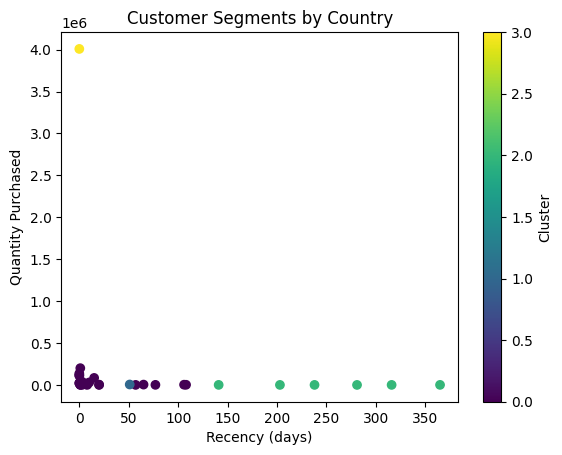

In [ ]:
import matplotlib.pyplot as plt

# Plot Recency vs. Quantity with clusters as colors
plt.scatter(df['Recency'], df['Quantity'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments by Country')
plt.xlabel('Recency (days)')
plt.ylabel('Quantity Purchased')
plt.colorbar(label='Cluster')
plt.show()


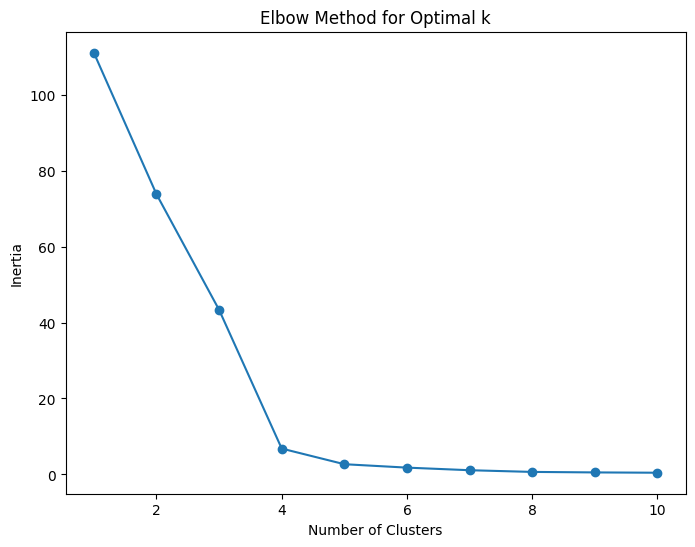

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


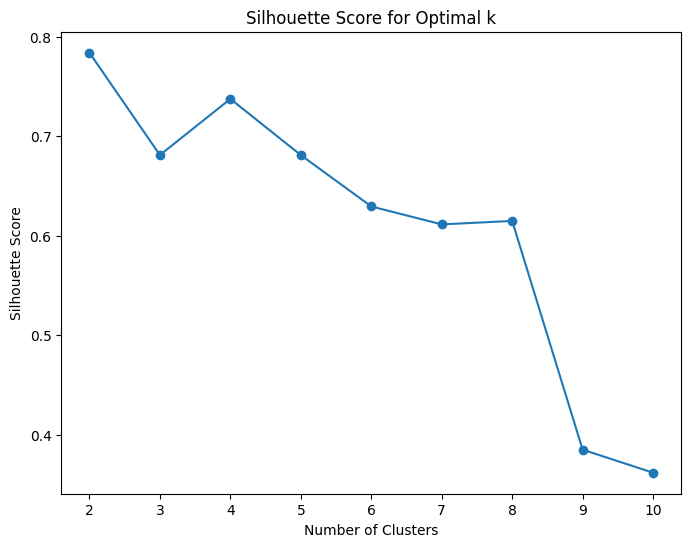

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Score for determining the optimal number of clusters
sil_scores = []
for k in range(2, 11):  # Silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    sil_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# Group by cluster and get the mean of features in each cluster
cluster_summary = df.groupby('Cluster')[['Quantity', 'UnitPrice', 'Recency']].mean()


print(cluster_summary)

             Quantity   UnitPrice     Recency
Cluster                                      
0        3.072052e+04    4.303645   17.827586
1        5.234000e+03  109.645808   51.000000
2        3.710000e+02    4.093426  257.333333
3        4.008533e+06    3.256007    0.000000


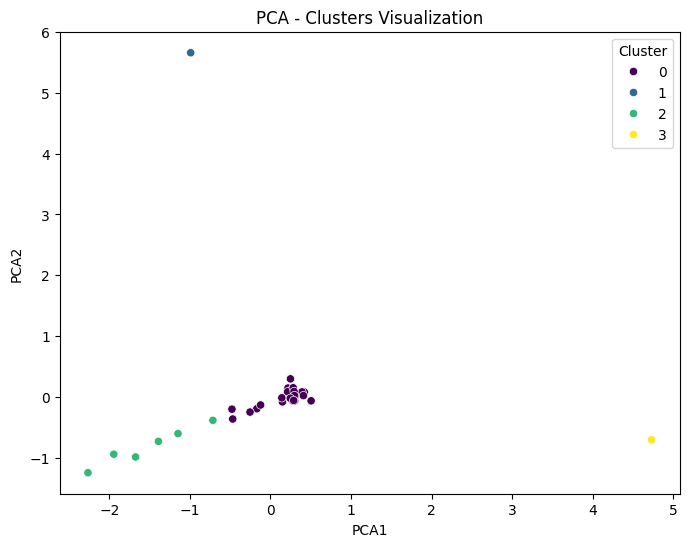

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('PCA - Clusters Visualization')
plt.show()


In [ ]:
df

,Country,Quantity,UnitPrice,Recency,Cluster
0,Australia,83653,3.220612,15,0
1,Austria,4827,4.243192,1,0
2,Bahrain,260,4.644118,203,2
3,Belgium,23152,3.644335,0,0
4,Brazil,356,4.456250,238,2
5,Canada,2763,6.030331,106,0
6,Channel Islands,9479,4.932124,1,0
7,Cyprus,6317,6.302363,7,0
8,Czech Republic,592,2.938333,20,0
9,Denmark,8188,3.256941,3,0
